<a id=0></a>
# 8.Numeric Features
※　数値型特徴量の取り扱い

---
### [1. スケーリング](#1)
### [2. 非線形変換](#2)
### [3.ビニング、離散化](#3)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

---
<a id=1></a>
[Topへ](#0)

---
## 1. スケーリング

* スケーリングの目的
* 代表的な4つのスケーラー
* サンプルアレイの作成
* StandardScaler
* MinMaxScaler
* MaxAbsScaler
* RobustScaler
---

スケーリングの目的

In [2]:
x = np.array([1, 1, 2])
y = np.array([1, 4, 1])
X = x * 1000

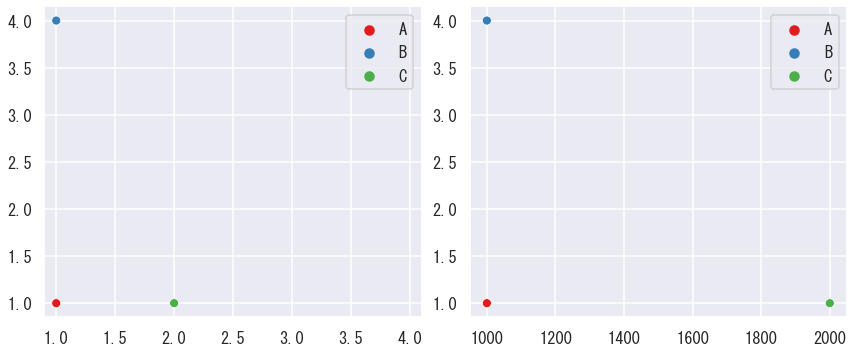

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
sns.scatterplot(x=x, y=y, ax=axes[0], hue=['A', 'B', 'C'], palette='Set1')
axes[0].set_xlim(0.9, 4.1)
sns.scatterplot(x=X, y=y, ax=axes[1], hue=['A', 'B', 'C'], palette='Set1')
plt.show()

代表的な4つのスケーラー

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [22]:
sc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rs = RobustScaler()

サンプルアレイの作成

In [31]:
np.ones((10, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [34]:
np.random.seed(17)
random_arr = np.random.randn(300, 1)
random_arr.min(), random_arr.max()

(-3.3999307792224305, 3.3451573949029427)

In [36]:
X = np.ones((300, 3)) * random_arr * [1, 100, 100]
X[:5]

array([[   0.27626589,   27.626589  ,   27.626589  ],
       [  -1.85462808, -185.46280788, -185.46280788],
       [   0.62390111,   62.39011113,   62.39011113],
       [   1.14531129,  114.53112896,  114.53112896],
       [   1.03719047,  103.71904682,  103.71904682]])

In [40]:
random_index = np.random.randint(0, 300, 10)
for i in random_index:
    X[i, 2] = X[i, 2] * 10
X[random_index]

array([[-1.56172362e-01, -1.56172362e+01, -1.56172362e+02],
       [ 7.75201683e-01,  7.75201683e+01,  7.75201683e+02],
       [ 1.26727211e-01,  1.26727211e+01,  1.26727211e+02],
       [-4.26631209e-01, -4.26631209e+01, -4.26631209e+02],
       [ 1.29497010e+00,  1.29497010e+02,  1.29497010e+03],
       [ 3.26021263e-02,  3.26021263e+00,  3.26021263e+01],
       [ 6.35158778e-01,  6.35158778e+01,  6.35158778e+02],
       [-1.66373475e+00, -1.66373475e+02, -1.66373475e+03],
       [-6.25262877e-01, -6.25262877e+01, -6.25262877e+02],
       [-4.37783153e-01, -4.37783153e+01, -4.37783153e+02]])

In [41]:
X[:,2].min(), X[:,2].max()

(-5077.261214203341, 1600.0595222957672)

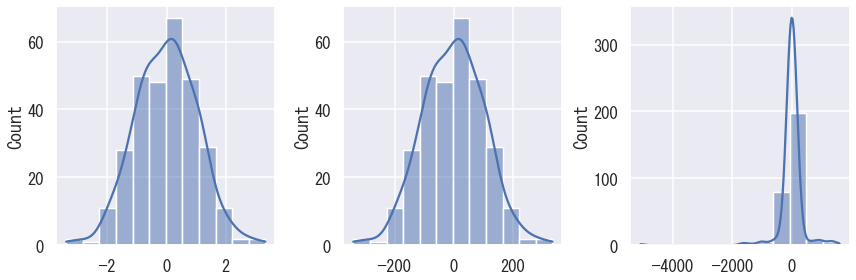

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
for i in range(3):
    sns.histplot(x=X[:,i], ax=axes[i], bins=12, kde=True)

StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
+ 標準化
+ X = (x - 平均値) / 標準偏差
+ 平均0、標準偏差1の分布になるようスケーリング

In [49]:
# sc.fit_transform(X[:, 1].reshape(-1, 1))

<Axes: ylabel='Count'>

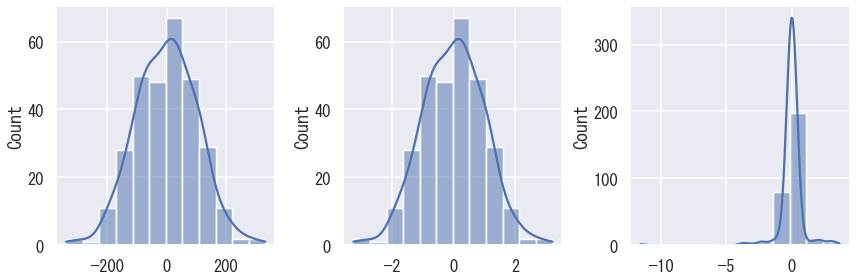

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

sns.histplot(x=X[:,1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=sc.fit_transform(X[:,1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=sc.fit_transform(X[:,2].reshape(-1, 1)).flatten(), ax=axes[2], bins=12, kde=True)

MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

* 正規化
* X = (x - 最小値) / (最大値 - 最小値)
* 最小0、最大1の分布になるようスケーリング

<Axes: ylabel='Count'>

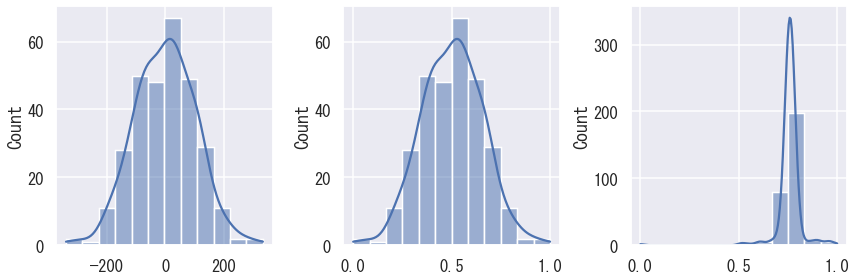

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

sns.histplot(x=X[:,1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=mms.fit_transform(X[:,1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=mms.fit_transform(X[:,2].reshape(-1, 1)).flatten(), ax=axes[2], bins=12, kde=True)

MaxAbsScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

* X = x / 最大絶対値
* X = x / maxabs
* -1～1の分布になるようスケーリング（少なくとも-1もしくは1の値を持つ）

<Axes: ylabel='Count'>

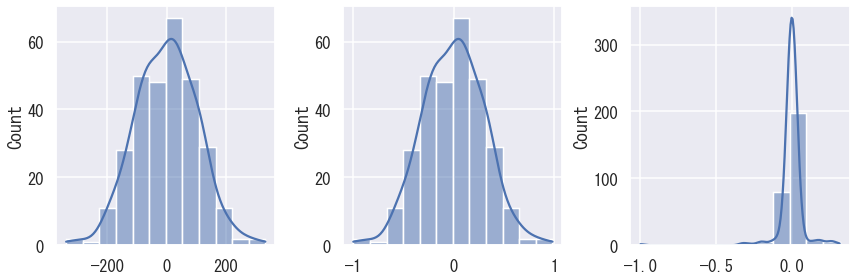

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

sns.histplot(x=X[:,1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=mas.fit_transform(X[:,1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=mas.fit_transform(X[:,2].reshape(-1, 1)).flatten(), ax=axes[2], bins=12, kde=True)

RobustScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html  

* X = (x - 中央値) / 四分位範囲
* X = x - med / IQR
* 中央値0、外れ値を除く大部分を対象にスケーリング

<Axes: ylabel='Count'>

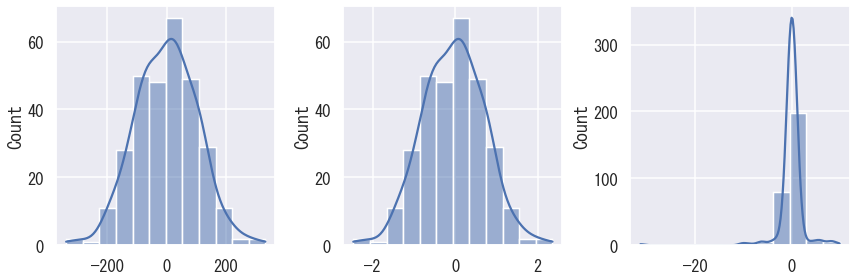

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

sns.histplot(x=X[:,1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=rs.fit_transform(X[:,1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=rs.fit_transform(X[:,2].reshape(-1, 1)).flatten(), ax=axes[2], bins=12, kde=True)

---
<a id=2></a>
[Topへ](#0)

---
## 2. 非線形変換

* ボストン住宅価格データセット
* QuantileTransformer  
    n_quantiles=1000, output_distribution='uniform'('normal')  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html  
  PowerTransformer  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
---

ボストン住宅価格データセット  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [59]:
from sklearn.datasets import fetch_california_housing

In [60]:
california = fetch_california_housing()

In [68]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [69]:
df = pd.DataFrame(california['data'], columns=california['feature_names'])

In [73]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


QuantileTransformer / PowerTransformer

In [77]:
# 四分位数を表す np.quantile
np.quantile(df['HouseAge'], [0, 0.25, 0.5, 0.75, 1])

array([ 1., 18., 29., 37., 52.])

In [78]:
np.percentile(df['HouseAge'], q=[0, 25, 50, 75, 100])

array([ 1., 18., 29., 37., 52.])

In [80]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

qut_n = QuantileTransformer(output_distribution='normal')
qut_u = QuantileTransformer(output_distribution='uniform')
pot = PowerTransformer()

In [103]:
def plots_transformed(feature):
    qut_n_arr = qut_n.fit_transform(df[[feature]]).flatten()
    qut_u_arr = qut_u.fit_transform(df[[feature]]).flatten()
    pot_arr = pot.fit_transform(df[[feature]]).flatten()
    
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), tight_layout=True)
    sns.histplot(x=df[feature], kde=True, bins=12, ax=axes[0], shrink=0.9)
    axes[0].set_title(feature)
    axes[0].set_xlabel('')
    sns.histplot(x=qut_n_arr, kde=True, bins=12, ax=axes[1], shrink=0.9)
    axes[1].set_title('Quantile normal')
    sns.histplot(x=qut_u_arr, kde=True, bins=12, ax=axes[2], shrink=0.9)
    axes[2].set_title('Quantile uniform')
    sns.histplot(x=pot_arr, kde=True, bins=12, ax=axes[3], shrink=0.9)
    axes[3].set_title('Power')


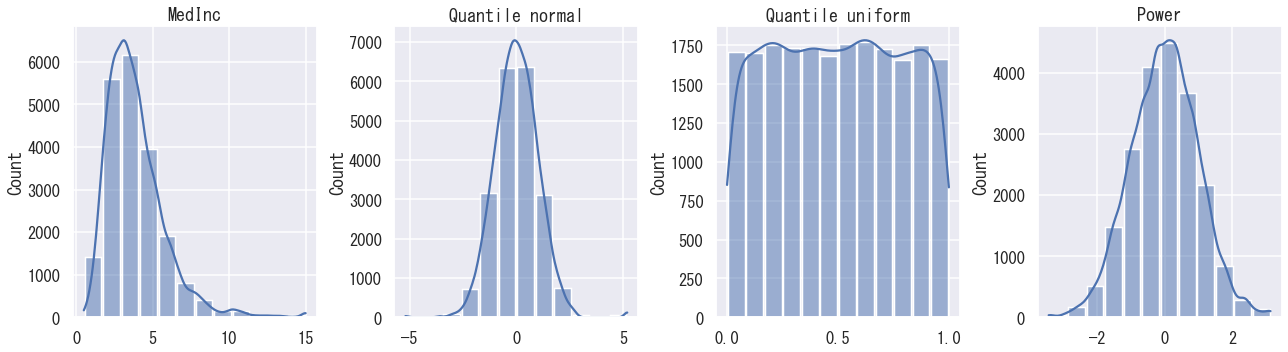

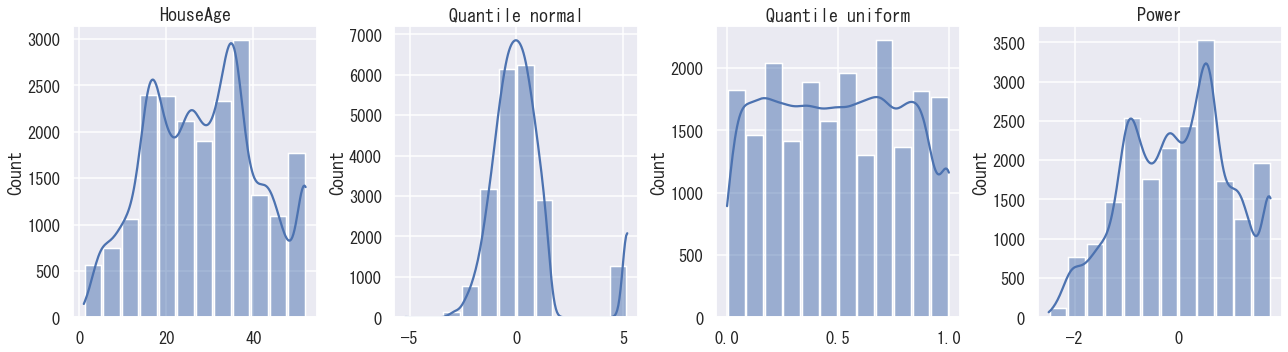

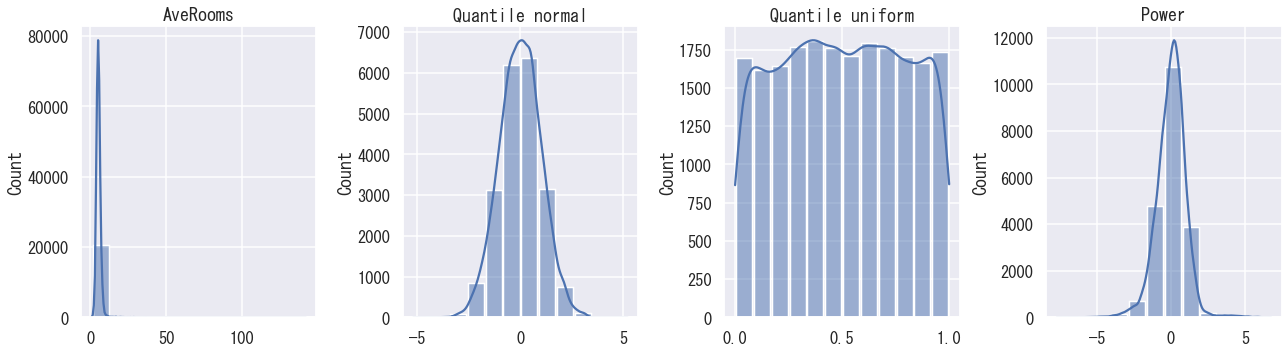

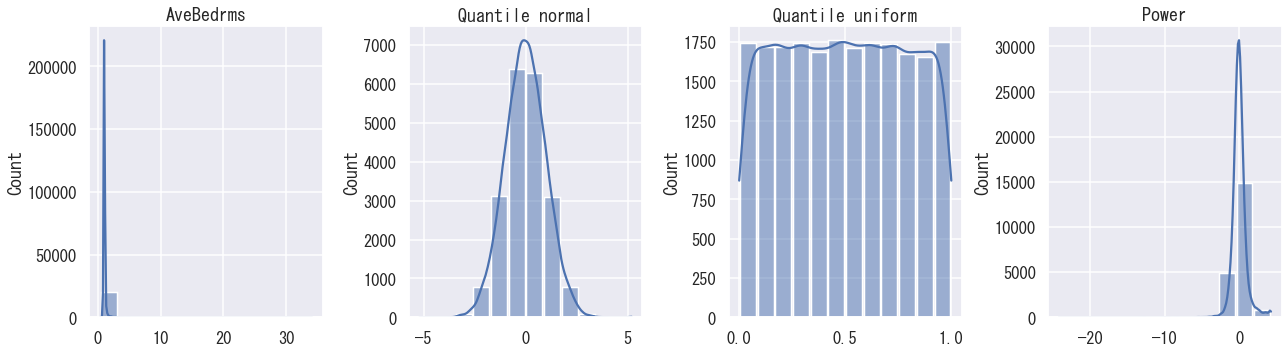

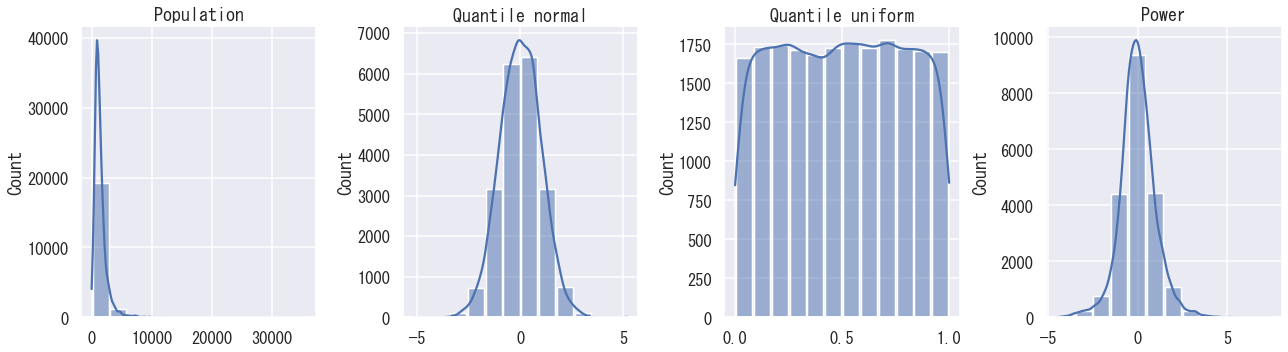

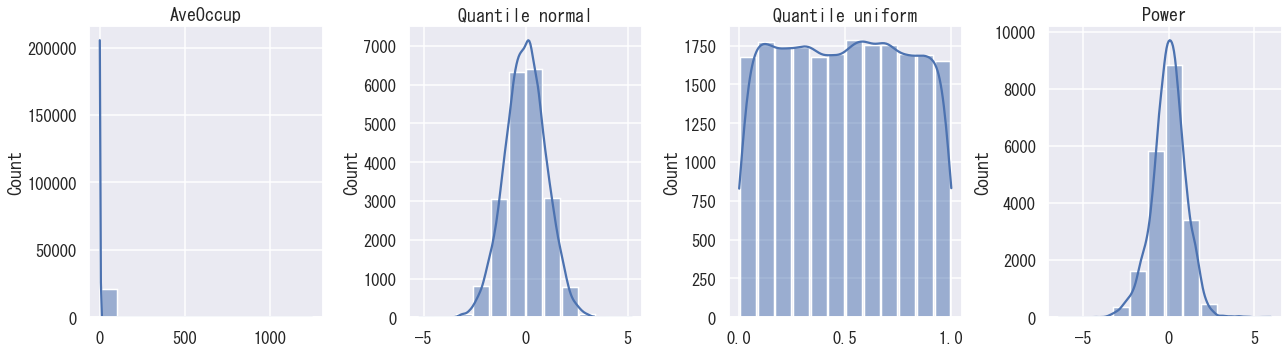

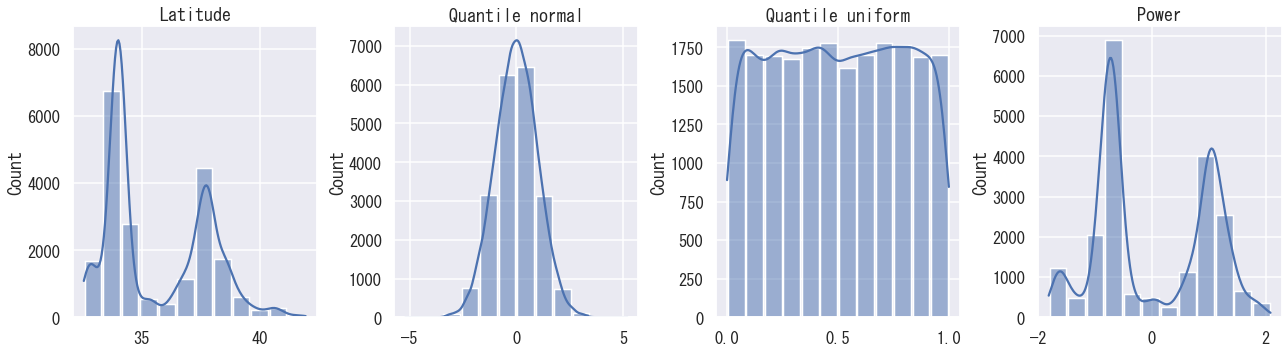

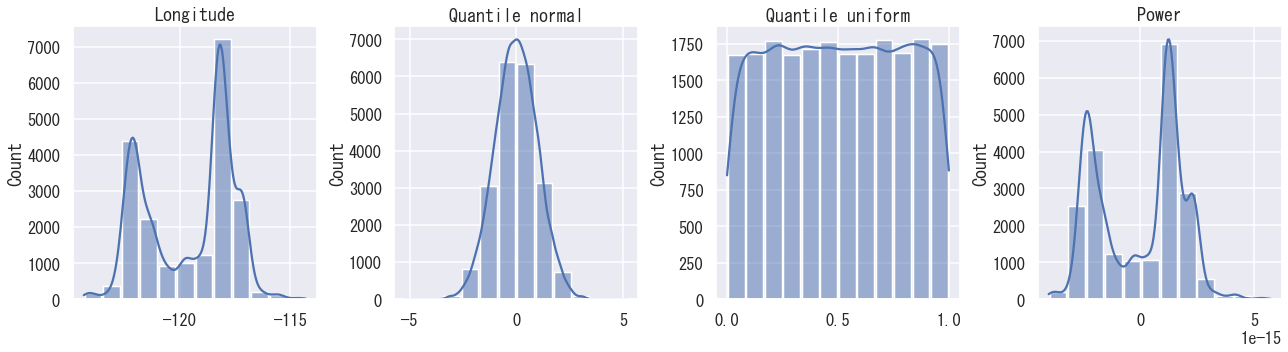

In [105]:
for feat in california['feature_names']:
    plots_transformed(feat)

---
<a id=3></a>
[Topへ](#0)

---
## 3. ビニング、離散化

* KBinsDiscretizer  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
* pd.cut()

KBinsDiscretizer  
Keyword Arguments : n_bins=5, strategy='quantile'('uniform', 'kmeans'),  encode='onehot'('onehot-dense', 'ordinal')

In [107]:
x = df[['HouseAge']].values
x.max(), x.min()

(52.0, 1.0)

In [110]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer_q = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
discretizer_u = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')

In [112]:
discretizer_q.fit(x)
discretizer_u.fit(x)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [114]:
discretizer_q.transform(x)[:5]

array([[4.],
       [1.],
       [4.],
       [4.],
       [4.]])

In [120]:
np.quantile(x, np.linspace(0, 1, 6))

array([ 1., 17., 25., 33., 40., 52.])

In [123]:
discretizer_q.transform([[2], [18], [26], [34], [41], [53]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [4.]])

In [124]:
discretizer_o = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot')

In [125]:
discretizer_o.fit_transform(x).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

pd.cut()

In [126]:
classes = pd.cut(x.flatten(), bins=[ 0, 17., 25., 33., 40., 52.],
                 labels=['very low', 'low', 'medium', 'high', 'very high'])

In [127]:
classes

['very high', 'low', 'very high', 'very high', 'very high', ..., 'low', 'low', 'very low', 'low', 'very low']
Length: 20640
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

In [128]:
type(classes)

pandas.core.arrays.categorical.Categorical

In [129]:
classes.unique()

['very high', 'low', 'high', 'very low', 'medium']
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---